# Part 3. Multi Level Perceptron from Scratch 

In the previous section, we attempted to train a simple 2 layer MLP on Keras. Keras, being a high level abstracted framework, hides the details behind the model and simplifies the process. We will now try to build our own 2 layer MLP, purely out of NumPy, which will unveil the hidden components of neural network training. Similar to past from-scratch attempts, we will start by creating a class.

## 1. Create a class `MLPTwoLayers`

- One of the starting points to take care of while building your network is to initialize your weight matrix correctly. Consider appropriate sizes for your input, hidden and output layers - your __init__ method should take in the params `input_size`, `hidden_size`, `output_size`. Then, using these variables, initialise the weights for the hidden layers `w1`, `w2`, `b1`, and `b2`.

In [19]:
import numpy as np
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')

train_val = np.concatenate([batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']],axis=0)
train_val_labels = batch1[b'labels']+batch2[b'labels']+batch3[b'labels']+batch4[b'labels']+batch5[b'labels']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_val, train_val_labels, test_size=0.2, random_state=7)
x_train = (x_train/255).astype('float32')

X = x_train
y = y_train

In [20]:
# %load_ext autoreload
# %autoreload 2
from src.mlp import MLPTwoLayers as MLP
mlp = MLP(3072, 100, 10)

## 2. Create a `forward ` method, which takes in a set of features
- Create the `forward` method to calculate the predicted class probabilities of an image. This is known as a forward pass.  You should wrap the hidden layer with a sigmoid function (or others if you prefer), and the output layer with a softmax function.

In [21]:
# import your data preparation methods here, ensure your data is randomized
preds = mlp.forward(X[0])
preds

array([0.08624176, 0.07983678, 0.11237382, 0.10214916, 0.06811944,
       0.20824757, 0.01832642, 0.0818175 , 0.09817378, 0.14471376])

## 3. Create a `loss` method, which takes in the predicted probability and actual label
- Compute the loss function: This is a function of the actual label y and predicted label y. It captures how far off our predictions are from the actual target. The objective is to minimize this loss function. 

In [22]:
train_loss = mlp.loss(preds, y[0])
train_loss

2.5032641539711387

## 4. Create a `backward` method, which takes in the loss
- Using the backpropogation algorithm, execute the backward pass and adjust the weights and bias accordingly
- You can use a default learning rate of 1e-3 for this exercise. If you would like do otherwise, you can try to implement it as a parameter.

In [23]:
mlp.backward(train_loss)

<span style="color:#003366"><b> The single loss value is not useful for backpropagtion. Inputs at each layer  the forward outputs (softmax probabilites) and the target are required.The input at each layer can be cache during the forward method call and the output probabilities and target  values can be cache during the loss method call.

<span style="color:#003366"><b> Gradient of input to softmax can be computed from the softmax probabilities and the actual labels as shown below. With this gradient (and inputs to output layer), the weights and bias gradient of the output layer can be computed. Also, using this gradient and the weights of the output layer, the gradient of the ouput of the previous hidden layer can be computed and so on. 

<img src="./backprop loss.png">

Now, we can try training the model.

In [24]:
# initial attempt at training
test_loss = 0
for i in range(3000, 3500):
    test_loss += mlp.loss(mlp.forward(X[i]), y[i])
print(test_loss / 500)

5.903473100320473


In [25]:
for i in range(3000):
    if i % 100==0:
        print('Item {}'.format(i))
    mlp.backward(mlp.loss(mlp.forward(X[i]), y[i]))

Item 0
Item 100
Item 200
Item 300
Item 400
Item 500
Item 600
Item 700
Item 800
Item 900
Item 1000
Item 1100
Item 1200
Item 1300
Item 1400
Item 1500
Item 1600
Item 1700
Item 1800
Item 1900
Item 2000
Item 2100
Item 2200
Item 2300
Item 2400
Item 2500
Item 2600
Item 2700
Item 2800
Item 2900


Finally, re-test your model.

In [26]:
test_loss = 0
for i in range(3000, 3500):
    test_loss += mlp.loss(mlp.forward(X[i]), y[i])
print(test_loss / 500)

2.314777194670336


<span style="color:#003366"><b> Cross entropy loss for images 3000-3500 decreases from 5.90 to 2.31 after training a simple two layer (100,10) neural network on images 0-3000.

Hopefully, you see that your test loss has decreased after training!

# Part 4. Convolutional Neural Network (CNN)
Please attempt this section only after you have completed the rest!

In the previous part, you implemented a multilayer perceptron network on CIFAR-10. The implementation was simple but not very modular since the loss and gradient were computed in a single monolithic function. This is manageable for a simple two-layer network, but would become impractical as you move to bigger models. Ideally, you want to build networks using a more modular design so that you can implement different layer types in isolation and then snap them together into models with different architectures.

In this part of exercise, you will implement a close to state-of-the-art deep learning model for CIFAR-10 with the Keras Deep Learning library. In addition to implementing convolutional networks of various depth, you will need to explore different update rules for optimization, and introduce **Dropout** as a regularizer, **Batch Normalization** and **Data Augmentation** as a tool to more efficiently optimize deep networks.

We saw models performing >98% accuracy on `CIFAR-10`, while most state-of-the-art models cross the 97% boundary. In general, models beyond **95%** are fairly decent.

## Reading resources

[Dropout](http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf?utm_content=buffer79b43&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer) is a regularization technique for overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks.

[Batch Normalization](https://pdfs.semanticscholar.org/c1ba/ed41e4bc9401b1b2ec8ef55ba45543f7a1a3.pdf) is a technique to provide any layer in a neural network with inputs that are zero mean/unit variance.

[Data Augmentation](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced) means increasing the number of data points. In terms of images, it may mean that increasing the number of images in the dataset.

- Enhancing the performance of you existing model in part 2 with convolutional neural networks
- The implementation of model should be done by using Keras (or PyTorch)
- Train your designed model 
- Improve performance with algorithm tuning: Dropout, Batch normalization, Data augmentation and other optimizers

### Keras

In [1]:
#For reproducibility
import numpy as np
import tensorflow as tf
import random
import os

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(5242)
random.seed(5242)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

from keras import backend as K
tf.set_random_seed(5242)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

C:\Users\LENOVO\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')

train_val = np.concatenate([batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']],axis=0)
train_val_labels = batch1[b'labels']+batch2[b'labels']+batch3[b'labels']+batch4[b'labels']+batch5[b'labels']

x_train, x_val, y_train, y_val = train_test_split(train_val, train_val_labels, test_size=0.2, random_state=42)

testset = unpickle('cifar-10-batches-py/test_batch')
x_test = testset[b'data']
y_test = testset[b'labels']

x_train = (x_train/255).astype('float32')
x_val = (x_val/255).astype('float32')
x_test = (x_test/255).astype('float32')

x_train = x_train.reshape(40000,32,32,3)
x_val = x_val.reshape(10000,32,32,3)
x_test = x_test.reshape(10000,32,32,3)

y_train = to_categorical(y_train,10,'float32')
y_val = to_categorical(y_val,10,'float32')

In [3]:
#data_augmentation

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True)

In [13]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D
from keras.regularizers import l2

Initializer = 'he_normal'
activation = Activation('relu')
Regularizer = l2
regparam = 1e-4

model2 = Sequential()

model2.add(Conv2D(8,(5,5), padding='valid', kernel_initializer=Initializer,kernel_regularizer=Regularizer(regparam),input_shape=x_train.shape[1:]))
model2.add(BatchNormalization(momentum=0.9))
model2.add(activation)
model2.add(MaxPooling2D(pool_size=2,strides=2))

model2.add(Conv2D(16,(5,5), padding='valid',kernel_regularizer=Regularizer(regparam), kernel_initializer=Initializer,))
model2.add(BatchNormalization(momentum=0.9))
model2.add(activation)
model2.add(MaxPooling2D(pool_size=2,strides=2))

model2.add(Flatten())

model2.add(Dense(512,kernel_initializer=Initializer,kernel_regularizer=Regularizer(regparam)))
model2.add(BatchNormalization(momentum=0.9))
model2.add(activation)
model2.add(Dropout(0.5,seed=123))

model2.add(Dense(64,kernel_initializer=Initializer,kernel_regularizer=Regularizer(regparam)))
model2.add(BatchNormalization(momentum=0.9))
model2.add(activation)
model2.add(Dropout(0.5,seed=123))

model2.add(Dense(10,kernel_initializer=Initializer,kernel_regularizer=Regularizer(regparam)))
model2.add(Activation('softmax'))

In [14]:
from keras import metrics
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.optimizers import RMSprop

sgd = SGD(momentum=0.9, nesterov=True)
rms = RMSprop(rho=0.9, epsilon=None)
adam = Adam(beta_1=0.9, beta_2=0.999, decay=0)

model2.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics = ['accuracy'])

In [16]:
from keras.callbacks import Callback
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from keras.models import load_model

def lr_sch(epoch):
    if epoch <= 10: lrate = 0.001
    elif epoch >10 and epoch<=30 : lrate = 0.0005 
    elif epoch >30 and epoch<=50 : lrate = 0.0001
    else : lrate = 0.00005        
    return lrate

lrsch = LearningRateScheduler(lr_sch)


#early stopping
early_stop = EarlyStopping(monitor= 'val_loss', min_delta = 0.0000, patience=10, mode='min')

#model_fit

batch_size = 16
modelfit = model2.fit_generator(datagen.flow(x_train, y_train, batch_size),
        steps_per_epoch = x_train.shape[0] / batch_size, 
        epochs=60,
        verbose=1,
        validation_data = (x_val,y_val),
        callbacks=[lrsch,early_stop] 
        )

Epoch 1/60
2500/2500 [==============================] - 152s 61ms/step - loss: 2.0392 - acc: 0.3217 - val_loss: 1.7558 - val_acc: 0.4116
Epoch 2/60
2500/2500 [==============================] - 149s 60ms/step - loss: 1.8014 - acc: 0.3957 - val_loss: 1.6379 - val_acc: 0.4482
Epoch 3/60
2500/2500 [==============================] - 149s 60ms/step - loss: 1.7397 - acc: 0.4210 - val_loss: 1.5965 - val_acc: 0.4749
Epoch 4/60
2500/2500 [==============================] - 149s 60ms/step - loss: 1.7069 - acc: 0.4346 - val_loss: 1.5494 - val_acc: 0.4759
Epoch 5/60
2500/2500 [==============================] - 149s 60ms/step - loss: 1.6775 - acc: 0.4464 - val_loss: 1.6526 - val_acc: 0.4405
Epoch 6/60
2500/2500 [==============================] - 149s 60ms/step - loss: 1.6630 - acc: 0.4518 - val_loss: 1.5823 - val_acc: 0.4639
Epoch 7/60
2500/2500 [==============================] - 149s 60ms/step - loss: 1.6451 - acc: 0.4593 - val_loss: 1.5330 - val_acc: 0.4902
Epoch 8/60
2500/2500 [===================

In [17]:
y_test1 = to_categorical(y_test,10,'float32')
eval1 = model2.evaluate(x_test,y_test1)
eval1

10000/10000 [==============================] - 13s 1ms/step


[1.177536709880829, 0.611]

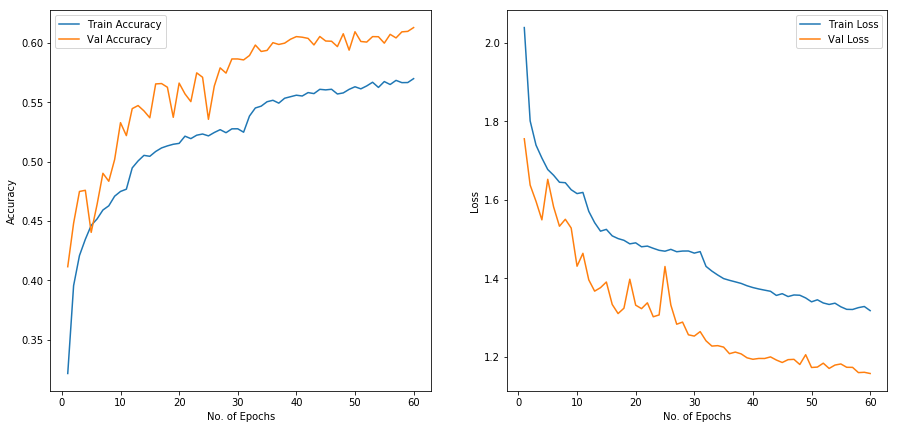

In [18]:
import pandas as pd
trainloss = pd.DataFrame(modelfit.history['loss'])
trainacc = pd.DataFrame(modelfit.history['acc'])
valloss = pd.DataFrame(modelfit.history['val_loss'])
valacc = pd.DataFrame(modelfit.history['val_acc'])

summary = pd.concat([trainloss,trainacc,valloss,valacc],axis=1)
summary.columns = ["train loss","train acc","val loss","val acc"]

import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1,2,figsize=(15, 7))
ax[0].plot(summary.index+1,summary['train acc'],label='Train Accuracy')
ax[0].plot(summary.index+1,summary['val acc'],label='Val Accuracy')
x_axis = ax[0].set_xlabel('No. of Epochs')
y_axis = ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(summary.index+1,summary['train loss'],label='Train Loss')
ax[1].plot(summary.index+1,summary['val loss'],label='Val Loss')
x_axis = ax[1].set_xlabel('No. of Epochs')
y_axis = ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

<span style="color:#003366"><b> Together with early stopping used in part 2, val accuracy and loss follows train accuracy and loss closely after other regularization methods (data augmentation, L2 regularization, dropout layers) was used in the CNN neural network. In data augmentation, rotations and random horizontal flips was added to the input images at each mini-batch. The end result is that the model will be trained on slightly different data at each epoch, preventing overfitting. This might also explain the lower val loss compared to train loss as the validation set was kept fixed. A learning rate scheduler (better control of learning rates), batch normalization (preventing covariate shifts between layers, momentum set to 0.9 to be consistent with pytorch and prevents excessive fluctuation of val loss) and ADAM optimizer (adding adaptive learning) was used here to allow the model to learn the train data better.

## PyTorch

In [5]:
import numpy as np
import torch
import torch.utils.data as utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms

torch.cuda.is_available()

True

In [3]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')

train_val = np.concatenate([batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']],axis=0)
train_val_labels = batch1[b'labels']+batch2[b'labels']+batch3[b'labels']+batch4[b'labels']+batch5[b'labels']

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_val, train_val_labels, test_size=0.2, random_state=42)

testset = unpickle('cifar-10-batches-py/test_batch')
x_test = testset[b'data']
y_test = testset[b'labels']

In [6]:
x_train = (x_train/255).astype('float32')
x_val = (x_val/255).astype('float32')
x_test = (x_test/255).astype('float32')

x_train = x_train.reshape(40000,3,32,32)
x_val = x_val.reshape(10000,3,32,32)
x_test = x_test.reshape(10000,3,32,32)

y_test= np.array(y_test)
y_val = np.array(y_val)
y_train = np.array(y_train)

tensor_xtrain = torch.stack([torch.Tensor(i) for i in x_train]) # transform to torch tensors
tensor_ytrain = torch.cuda.LongTensor(y_train)
tensor_xval = torch.stack([torch.Tensor(i) for i in x_val]) # transform to torch tensors
tensor_yval = torch.cuda.LongTensor(y_val)
tensor_xtest = torch.stack([torch.Tensor(i) for i in x_test]) # transform to torch tensors
tensor_ytest = torch.cuda.LongTensor(y_test)

trainset = utils.TensorDataset(tensor_xtrain,tensor_ytrain)
valset = utils.TensorDataset(tensor_xval,tensor_yval)
testset = utils.TensorDataset(tensor_xtest,tensor_ytest)

batch_size =64

train_loader = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
validation_loader = torch.utils.data.DataLoader(valset,batch_size=batch_size,shuffle=False)
test_loader = torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

data_loaders = {"train": train_loader, "val": validation_loader}
data_lengths = {"train": x_train.shape[0]/batch_size, "val": x_val.shape[0]/batch_size}

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 5, padding = 2)
        self.bn1 = nn.BatchNorm2d(num_features=8)
        self.conv2 = nn.Conv2d(8, 16, 3, padding =1)
        self.bn2 = nn.BatchNorm2d(num_features=16)
        self.conv3 = nn.Conv2d(16, 32, 3, padding =1)
        self.bn3 = nn.BatchNorm2d(num_features=32)
        self.conv4 = nn.Conv2d(32, 64, 3, padding =1)
        self.bn4 = nn.BatchNorm2d(num_features=64)

        self.fc1 = nn.Linear(64 * 8* 8,512)
        self.bn6 = nn.BatchNorm1d(num_features=512)
        self.fc2 = nn.Linear(512, 64)
        self.bn7 = nn.BatchNorm1d(num_features=64)
        self.fc3 = nn.Linear(64, 10)
        
        self.drop = nn.Dropout(p=0.6)
        self.drop2d = nn.Dropout2d(p=0.2)
        self.pool1 = nn.AvgPool2d(2, 2)
        self.pool2 = nn.AvgPool2d(3, 2)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(F.relu(self.bn2(self.conv2(x))))
        x = self.drop2d(F.relu(self.bn3(self.conv3(x))))
        x = self.pool1(self.drop2d(F.relu(self.bn4(self.conv4(x)))))
        x = x.view(-1, 64 * 8 * 8) #Flatten
        x = self.drop(F.relu(self.bn6(self.fc1(x))))
        x = F.relu(self.bn7(self.fc2(x)))
        x = self.fc3(x)
        return x

net = Net()
net = net.cuda()

from torchvision.transforms import *

trans = Compose([RandomRotation(15),
                 RandomHorizontalFlip(p=0.3),                 
                 ToTensor()])

criterion = nn.CrossEntropyLoss()

In [8]:
n_epochs=150
patience = 15

early_stop = [np.Inf]*patience
train_loss,val_loss = [], []
np.random.seed(1)

for epoch in range(n_epochs):  # loop over the dataset multiple times
    print('Epoch {}/{}'.format(epoch+1, n_epochs))
    print('-' * 10)
  
    # learning rate schedule
    elp = 15
    decay = 0.5
    rate = 0.001
    
    if epoch == 0: lrate = rate
    elif epoch >0 and epoch%elp ==0 : lrate = rate * (decay**(epoch//elp))
    elif epoch >0 and epoch%elp !=0 : lrate = rate * (decay**(epoch//elp))   

    for phase in ['train', 'val']:
        if phase == 'train':
            #optimizer = optim.SGD(net.parameters(), lr=lrate,momentum=0.9,nesterov=True,weight_decay=5e-4)
            optimizer = optim.Adam(net.parameters(), lr=lrate, betas=(0.9, 0.999), eps=1e-08, weight_decay=5e-3)
            net.train(True)  # Set model to training mode
        else:
            net.train(False)    
    
        running_loss = 0.0
        
        for data in data_loaders[phase]:#iteration loop for each minibatch
            # get the inputs
            inputs, labels = data
            
            #data augmentation
            inputs = [functional.to_pil_image(input0) for input0 in inputs] 
            for i in range(len(inputs)):
                if np.random.random() >=0.5: inputs[i] = trans(inputs[i])
                else: inputs[i] = ToTensor()(inputs[i])
            inputs = torch.stack(inputs).cuda()

            # zero the parameter gradients to accumulate again using loss.backward() in every iteration
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs) # forward
            loss = criterion(outputs, labels) #get loss 
            
            if phase == 'train':
                loss.backward() #backpropagation
                optimizer.step()  #update parameters

            # print statistics
            running_loss += loss.item()        
        
        epoch_loss = running_loss / data_lengths[phase]
        print('{} Loss: {:.4f}'.format(phase, epoch_loss))
        if phase == 'train': train_loss.append(epoch_loss)
        if phase == 'val': val_loss.append(epoch_loss)
    print()
          
    if phase == 'val': #early stopping block        
        if len(early_stop) == patience: del early_stop[0]        
        early_stop.append(running_loss)
        if min(early_stop) == early_stop[0] : break      

print('\nFinished Training')

Epoch 1/150
----------
train Loss: 1.6508
val Loss: 1.3552

Epoch 2/150
----------
train Loss: 1.3703
val Loss: 1.1982

Epoch 3/150
----------
train Loss: 1.2798
val Loss: 1.1317

Epoch 4/150
----------
train Loss: 1.2273
val Loss: 1.0692

Epoch 5/150
----------
train Loss: 1.1845
val Loss: 1.2029

Epoch 6/150
----------
train Loss: 1.1638
val Loss: 1.1010

Epoch 7/150
----------
train Loss: 1.1485
val Loss: 1.0090

Epoch 8/150
----------
train Loss: 1.1277
val Loss: 1.0071

Epoch 9/150
----------
train Loss: 1.1205
val Loss: 0.9953

Epoch 10/150
----------
train Loss: 1.1132
val Loss: 0.9843

Epoch 11/150
----------
train Loss: 1.1067
val Loss: 1.0015

Epoch 12/150
----------
train Loss: 1.0958
val Loss: 0.9857

Epoch 13/150
----------
train Loss: 1.0890
val Loss: 0.9395

Epoch 14/150
----------
train Loss: 1.0815
val Loss: 0.9555

Epoch 15/150
----------
train Loss: 1.0717
val Loss: 0.9474

Epoch 16/150
----------
train Loss: 0.9957
val Loss: 0.8460

Epoch 17/150
----------
train Los

In [9]:
correct = 0
total = 0
pred = []
loss = []
with torch.no_grad(): #temporarily set all the requires_grad flag to false.
    for data in test_loader:
        images, labels = data
        outputs = net(images.cuda())
        _, predicted = torch.max(outputs.data, 1) # value,idx of max value of outputs.data at axis 1
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        loss.append(criterion(outputs, labels))
        pred.append(predicted.tolist())       

print('Accuracy of the network on the 10000 test images: %.2f %%' % (100 * correct / total))
print('Loss of the network on the 10000 test images: %.2f' % (np.mean(loss)))

import pandas as pd
pred = [item for sublist in pred for item in sublist]
#pd.DataFrame(pred).to_csv('cnn/pred_8309.csv',index=False)

Accuracy of the network on the 10000 test images: 83.70 %
Loss of the network on the 10000 test images: 0.49


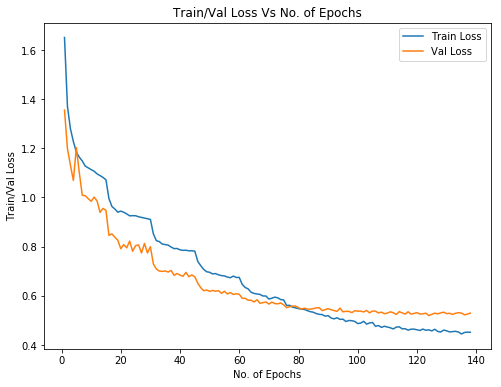

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(8, 6))
plt.plot(list(range(1,len(train_loss)+1)),train_loss,label='Train Loss')
plt.plot(list(range(1,len(val_loss)+1)),val_loss,label='Val Loss')
ax.set_title('Train/Val Loss Vs No. of Epochs')
x_axis = plt.xlabel('No. of Epochs')
y_axis = plt.ylabel('Train/Val Loss')
plt.legend()
plt.show() 

<span style="color:#003366"><b> The CNN model was optimized using pytorch framework trained using GPU on Google Cloud Platform. As shown in the plot, overfitting was minimized compared to part 2 in the optimized model. In Keras, data augmentation was done automatically using the ImageDataGenerator(). Here, data augmentation was better controlled with manual customization of the data augmentation. Potential rotations and horizontal flips was only performed on 50% of the train images.   

## Final Summary

In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch2 = unpickle('cifar-10-batches-py/data_batch_2')
batch3 = unpickle('cifar-10-batches-py/data_batch_3')
batch4 = unpickle('cifar-10-batches-py/data_batch_4')
batch5 = unpickle('cifar-10-batches-py/data_batch_5')

train_val = np.concatenate([batch1[b'data'],batch2[b'data'],batch3[b'data'],batch4[b'data'],batch5[b'data']],axis=0)
train_val_labels = batch1[b'labels']+batch2[b'labels']+batch3[b'labels']+batch4[b'labels']+batch5[b'labels']

x_train, x_val, y_train, y_val = train_test_split(train_val, train_val_labels, test_size=0.2, random_state=42)

testset = unpickle('cifar-10-batches-py/test_batch')
x_test = testset[b'data']
y_test = testset[b'labels']


In [2]:
import pandas as pd
knn = pd.read_csv('knn/pred.csv')
mlp = pd.read_csv('mlp/pred.csv')
cnn = pd.read_csv('cnn/pred_8370.csv')

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Average Accuracy for KNN: ',accuracy_score(y_test,knn))
print('Average Accuracy for MLP: ',accuracy_score(y_test,mlp))
print('Average Accuracy for CNN: ',accuracy_score(y_test,cnn))
print()

Average Accuracy for KNN:  0.4228
Average Accuracy for MLP:  0.5457
Average Accuracy for CNN:  0.837



In [3]:
knn_cm = confusion_matrix(y_test, knn)
knn_res = pd.DataFrame(knn_cm.diagonal()/[np.sum(np.array(y_test)==i) for i in list(range(10))]*100,columns = ['Accuracy'])
mlp_cm = confusion_matrix(y_test, mlp)
mlp_res = pd.DataFrame(mlp_cm.diagonal()/[np.sum(np.array(y_test)==i) for i in list(range(10))]*100,columns = ['Accuracy'])
cnn_cm = confusion_matrix(y_test, cnn)
cnn_res = pd.DataFrame(cnn_cm.diagonal()/[np.sum(np.array(y_test)==i) for i in list(range(10))]*100,columns = ['Accuracy'])

sum1 = pd.concat([knn_res.T,mlp_res.T,cnn_res.T],axis=0)
sum1.index = ['KNN','MLP','CNN'] 
sum1

,0,1,2,3,4,5,6,7,8,9
KNN,57.5,41.2,40.5,20.1,42.5,26.7,58.2,37.6,62.7,35.8
MLP,58.3,69.0,44.3,39.7,48.2,45.5,54.5,61.3,69.7,55.2
CNN,86.2,91.5,73.4,69.2,85.6,74.0,88.3,87.4,90.5,90.9


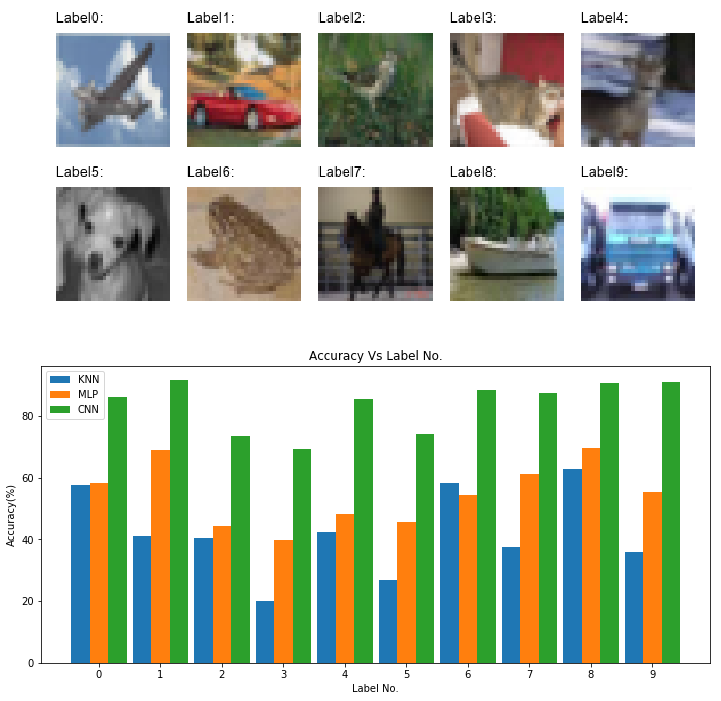

In [4]:
import random
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 

random.seed(1)

new_im = Image.new('RGB', (560, 260),'white')
draw = ImageDraw.Draw(new_im)
#font = ImageFont.load("arial.pil")
font = ImageFont.truetype("arial.ttf", 12)

y_offset = 20
x_offset = 0
for n in range(10):
    idx_list = [idx for idx,x in enumerate(y_train) if x == n]
    idx = random.sample(idx_list, 1)    

    red = x_train[idx,:1024]
    red = red.reshape(32,32)
    green= x_train[idx,1024:2048]
    green = green.reshape(32,32)
    blue= x_train[idx,2048:]
    blue = blue.reshape(32,32)
    full = np.dstack((red,green,blue))
   
    img = Image.fromarray(full, 'RGB')
    im = img.resize((100,100))
    new_im.paste(im, (x_offset,y_offset))    
    draw.text((x_offset, y_offset-20),'Label'+str(n)+': ',(0,0,0),font=font)
    x_offset += 115
    if n ==4: 
        y_offset = 155
        x_offset = 0


import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(2,1,figsize=(12, 12))

ax[0].imshow(new_im)
ax[0].axis('off')

ax[1].bar(np.array(range(10))-0.3,sum1.loc['KNN',:],width=0.3,label='KNN')
ax[1].bar(np.array(range(10)),sum1.loc['MLP',:],width=0.3,label='MLP')
ax[1].bar(np.array(range(10))+0.3,sum1.loc['CNN',:],width=0.3,label='CNN')
ax[1].set_title('Accuracy Vs Label No.')
x_axis = ax[1].set_xlabel('Label No.')
y_axis = ax[1].set_ylabel('Accuracy(%)')
ax[1].set_xticks(range(10))
ax[1].legend()
plt.show() 

<span style="color:#003366"><b> The CNN image classifer does a good job at most of the labels, achieving an accuracy > 85%.The classifier does better at machines images such as cars(class 1), ships(class 8) and trucks(class9) with an accuracy >90%.   Birds (class 2), Cats (class 3) and Dogs (class 5) clearly appears to be the hardest to classify, with accuracy < 75%.